# Importy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

#random seed dovoľuje numpy generovať pseudo náhodné hodnoty.
np.random.seed(0)

# Dataset (MNIST)

In [2]:
from keras.datasets import mnist
#načítanie datasetu mnist do premenných z databázy Keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
#výpis dimenzií jednotlivých premenných pre kontrolu správnosti načítania datasetu
#máme 60000 obrázkov číslic 28x28 a 60000 labelov v trénovacej množine
# a v testovacej máme 10000 hodnôt
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Vizualizovanie datasetu

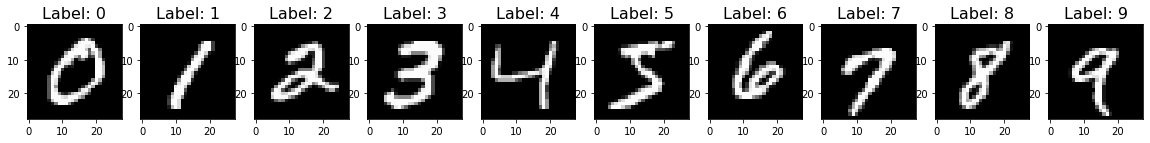

In [4]:
num_classes = 10 #pre vizualizovanie čísiel 0-9
f, ax = plt.subplots(1, num_classes, figsize=(20,20))#1 riadok, num_classes stlpcov a veľkosť grafu je 20x20

for i in range(0, num_classes): #0 až 10 (num_classes)
  sample = x_train[y_train == i][0] # vyberieme obrázok z x_train kde sa y_train(label) rovná i a vyberieme vždy prvý obrázok
  ax[i].imshow(sample, cmap='gray') #zobrazenie obrázku v každom grafe, grayscale
  ax[i].set_title("Label: {}".format(i), fontsize=16) #zobrazenie labelu nad každým grafom s prislúchajúcou hodnotou

In [5]:
#vypis labelov
for i in range(10):
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4


Pre klasifikovanie číslic musíme zmeniť labely z čísiel na samostatné classy, pretože ak by nejaká hodnota bola klasifikaná ako niečo medzi 4 a 5 tak label by bol 4,5 ale my chceme vidieť ku ktorej hodnote sa to najviac blíži.

In [6]:
#konvertovaie labelov z celých čisiel na binárnu maticu pre presné klasifikovanie
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
#vypis labelov po konvertovaní 
for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Príprava datasetu
Dáta si najskôr musíme normalizovať aby sa zjednodušili výpočty neurónovej siete a aby boli menšie odchýlky. Moje dáta majú hodnoty od 0 po 255(RGB hodnoty obrázkov), takže trénovacie dáta vydelíme hodnotou 255 aby sme dostali hodnoty od 0 po 1 na miesto hodnôt od 0 po 255

In [8]:
#normalizácia hodnôt
x_train = x_train / 255.0
x_test = x_test / 255.0

Potrebujeme pretvarovať dáta, pretože teraz má každý obrázok rozmery 28x28 ale ak ich chceme poslať do neurónovej siete na spracovanie, musíme ich pretvarovať na jeden dlhý vektor(v tomto prípade bude mať veľkosť 784).

In [9]:
#pretvarovanie dát
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


# Vytvorenie modelu plne prepojenej neurónovej siete

In [10]:
model = Sequential()

model.add(Dense(units = 128, input_shape = (784,), activation = "relu"))
model.add(Dense(units = 128, activation="relu"))
model.add(Dropout(0.25)) # 25% neurónov bude neaktívnych počas trénovania, 
model.add(Dense(units=10, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Trénovanie neurónovej siete

In [11]:
batch_size = 512 # počet obrázkov, spracovávaných neurónovou sieťou v jednom momente
epochs = 10
history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 1s 3ms/step - loss: 1.0614 - accuracy: 0.6788
Epoch 2/10
118/118 [==============================] - 0s 3ms/step - loss: 0.2489 - accuracy: 0.9268
Epoch 3/10
118/118 [==============================] - 0s 3ms/step - loss: 0.1775 - accuracy: 0.9475
Epoch 4/10
118/118 [==============================] - 0s 3ms/step - loss: 0.1307 - accuracy: 0.9608
Epoch 5/10
118/118 [==============================] - 0s 3ms/step - loss: 0.1122 - accuracy: 0.9667
Epoch 6/10
118/118 [==============================] - 0s 3ms/step - loss: 0.0924 - accuracy: 0.9726
Epoch 7/10
118/118 [==============================] - 0s 3ms/step - loss: 0.0767 - accuracy: 0.9769
Epoch 8/10
118/118 [==============================] - 0s 3ms/step - loss: 0.0724 - accuracy: 0.9789
Epoch 9/10
118/118 [==============================] - 0s 3ms/step - loss: 0.0595 - accuracy: 0.9816
Epoch 10/10
118/118 [==============================] - 0s 3ms/step - loss: 0.0534 - accuracy: 0.9839

In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


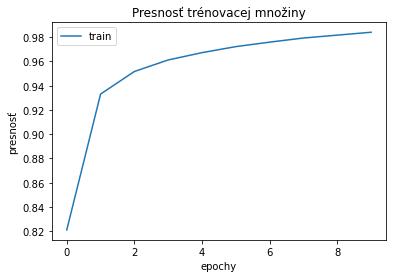

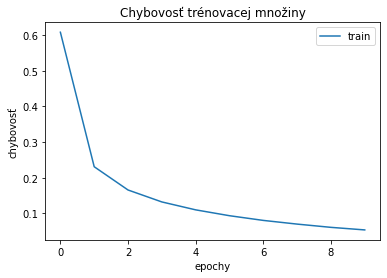

In [13]:
plt.plot(history.history['accuracy'])
plt.title('Presnosť trénovacej množiny')
plt.ylabel('presnosť')
plt.xlabel('epochy')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Chybovosť trénovacej množiny')
plt.ylabel('chybovosť')
plt.xlabel('epochy')
plt.legend(['train'], loc='upper right')
plt.show()

# Vyhodnotenie testovacej množiny

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Testovacia chybovosť: {}, Testovacia presnosť: {}".format(test_loss, test_acc))

313/313 [==============================] - 0s 398us/step - loss: 0.0742 - accuracy: 0.9764
Testovacia chybovosť: 0.07423112541437149, Testovacia presnosť: 0.9764000177383423
